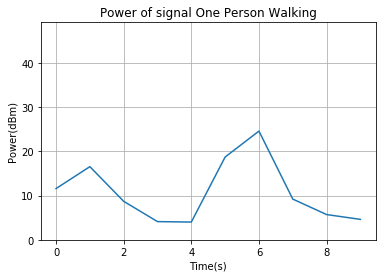

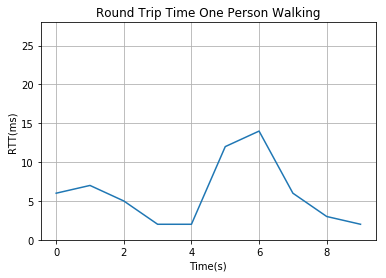

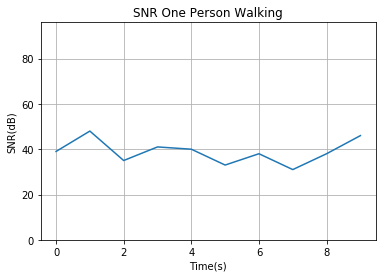

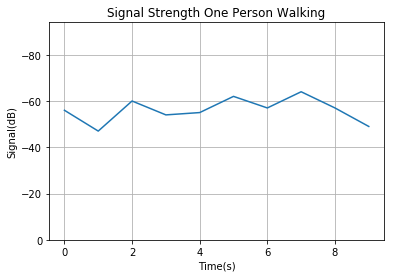

In [17]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

class Signals:
    
    def __init__(self):  
        self.pwr = []
        self.snr = []
        list1 = self.extractSignal('../data/1pwalking-signal-3.txt')
        list2 = self.extractRTT('../data/1pwalking-3.txt')
        self.saveData(list1, list2)
        fig1 = self.plot(self.pwr, 'Time(s)', 'Power(dBm)', 'Power of signal One Person Walking')
        fig2 = self.plot(list2, 'Time(s)', 'RTT(ms)', "Round Trip Time One Person Walking")
        fig3 = self.plot(self.snr, 'Time(s)', 'SNR(dB)', "SNR One Person Walking")
        self.plot(list1, 'Time(s)', 'Signal(dB)', "Signal Strength One Person Walking")
        self.savePlot(fig1, '../data/1p-power.png')
        self.savePlot(fig2, '../data/1p-rtt.png')
        self.savePlot(fig3, '../data/1p-snr.png')
        return
        
    def power(self,snr,rtt):
        '''
        This function takes Round-Trip-Time(s) and Signal-To-Noise(dB) as parameters which are
        then used to measure and return the value of Power.
        
        speed of light ==> 3 x 10^-8 m/s
        Wavelength of Wifi signals ==> 0.125m

        '''
        pwr = np.imag(snr * cmath.exp((1j * 2 * cmath.pi * rtt)/(3*(10**(8)))) * cmath.exp((1j * 2 * cmath.pi * rtt)/(0.125)))
        self.pwr.append(pwr)
        return pwr
    
    def computeSNR(self,signal):
        '''
        This function takes the value of signal(dB) as a parameter which is further used 
        to calculate and return the value of SNR.
        
        The average noise in typical enviroments in -95dB.
        '''
        signal = signal + 95
        self.snr.append(signal)
        return signal
    
    def saveData(self,list1, list2):
        '''
        This function takes data of RTT and SNR in the form of list as parameter, calculates power 
        and then saves all these data in a file.
        '''
        file = open('final-data.txt','w')
        file.write('Time(s)' + "\t" + 'SNR(dB)' + "\t" + 'RTT(ms)' + "\t" + 'Power(dBm) ' +"\n" )
        for i in range(len(list1)):
            snr = self.computeSNR(list1[i])
            file.write(str(i+1) + "\t" + str(snr) + "\t" + str(list2[i]) + "\t" + str(self.power(snr,list2[i]*(10**-3))) +"\n")
        file.close()
        return

    def extractSignal(self, filename):
        '''
        This function takes filename(string) as parameter, which is the filename/path
        of the file containg values of signals which it extracts, appends into a list 
        and then returns that list.
        '''
        data = open(filename).read()
        list1=[]
        data = data.split('\n')
        data = data[:-1]
        for i in range(len(data)):
            data[i] = data[i].strip()
            data[i] = int(data[i][-7:-4])
        return data

    def extractRTT(self, filename):
        '''
        This function takes filename(string) as parameter, which is the filename/path
        of the file containg values of RTT which it extracts, appends into a list 
        and then returns that list.
        '''
        corpus = open(filename).read()
        corpus = corpus.split('\n')
        corpus = corpus[1:-1]
        data = []
        for row in corpus:
            temp_list = (row.split('\t\t'))
            data.append(float(temp_list[2]))
        return data


    def plot(self, data, X, Y, Title ):
        '''
        This function takes data(list) and three strings as parameter. The data is used to
        plot the graph while X is label of the x-axis, Y is the label of the y-axis and the
        Title is the heading of the plot. This function returns the fig object of the plot 
        which can further be used to save the plot in the form of an image.
        
        '''
        fig, ax = plt.subplots()
        ax.plot(data)

        ax.set(xlabel= X, ylabel= Y,
        title= Title)
        plt.ylim(0,2*(max(data)))
        ax.grid()
        plt.show()
        return fig
    
    def savePlot(self,fig,filename):
        '''
        This function takes filename(string) and fig(object) as parameter. The fig object
        is then used to save the plot as an image with the name as filename.
        '''
        fig.savefig(filename)
        return
    
    
    
if __name__ == "__main__":
    obj = Signals()
        



    